In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# show plot in the notebook
# allow reload the notebook whenever changes are made
#%reload_ext autoreload
#%autoreload 2
import matplotlib.lines as lines
from matplotlib import collections  as mc
from collections import *
from matplotlib.pyplot import figure
from matplotlib.patches import Rectangle

In [3]:
def getChrSize(file):
    '''
    chromosome size file
    return a dict {'LG1': XXXXX}
    '''
    chrSizeDict = {}
    with open(file) as inf:
        for line in inf:
            line = line.rstrip()
            chrom, length = line.split()
            chrSizeDict[chrom] = length
    return chrSizeDict

def getchrPos(LG1=[21.6, 22.4]): # default starting point
    #chr1=[-0.4,0.4]
    '''
    {'chr23': [-0.4, 0.4], 'chr22': [0.6, 1.4], 'chr21': [1.6, 2.4], 'chr20': [2.6, 3.4], 
    'chr19': [3.6, 4.4], 'chr18': [4.6, 5.4], 'chr17': [5.6, 6.4], 'chr16': [6.6, 7.4], 
    'chr15': [7.6, 8.4], 'chr14': [8.6, 9.4], 'chr13': [9.6, 10.4], 'chr12': [10.6, 11.4], 
    'chr11': [11.6, 12.4], 'chr10': [12.6, 13.4], 'chr9': [13.6, 14.4], 'chr8': [14.6, 15.4], 
    'chr7': [15.6, 16.4], 'chr6': [16.6, 17.4], 'chr5': [17.6, 18.4], 'chr4': [18.6, 19.4], 
    'chr3': [19.6, 20.4], 'chr2': [20.6, 21.4], 'chr1': [21.6, 22.4]}
    '''
    chrPosList = {}
    for i in range(1,24):
        chrPosList['LG{}'.format(i)] = [x - 1 * (i-1) for x in LG1]
    return chrPosList

def getDNMPos(DNM_pos_file):
    '''
    return [chr, pos, times] 
    '''
    DNMPosList = []
    DNMPosCountDict = {}
    with open(DNM_pos_file) as inf:
        for line in inf:
            line = line.rstrip()
            DNMPosList.append(tuple(line.split()[:2]))
            DNMPosCountDict = Counter(DNMPosList)
            
    return DNMPosCountDict

def addLines(DNMbed):
    "bg line"
    chrPosList = getchrPos()
    DNMPos = getDNMPos(DNMbed)
    lines = []
    for k,v in DNMPos.items():
        chrom, pos = k
        indCount = int(v)
        lines.append([(pos, chrPosList[chrom][0]),(pos, chrPosList[chrom][1])])
    return lines


def addPropLines(DNMbed):
    "proportion line"
    chrPosList = getchrPos()
    DNMPos = getDNMPos(DNMbed)
    lines = []
    for k,v in DNMPos.items():
        chrom, pos = k
        indCount = int(v)
        lines.append([(pos, chrPosList[chrom][0]),(pos,chrPosList[chrom][0]+ 0.08*indCount)])
    return lines


def cdsReg(file):
    #file = "/Users/rainlam/Project/snpeff_analysis/FR26.dnm.annt.stats"
    type_snp_list = []
    xyset = []
    with open(file, "r") as inf:
        for line in inf:
            tmp = line.split("\t")
            type_tmp = tmp[-1].split("|")[:2]
            #print(tmp[:4] + [type_tmp[-1]])
            if "missense" in type_tmp[-1] or "synonymous" in type_tmp[-1]:
                type_snp_list.append(tuple(tmp[:4] + [type_tmp[-1]]))
    snp_list = list(set(type_snp_list))
    for i in type_snp_list:
        x = round(21.6 - int(i[0][2:]) + 1 - 0.02, 3)
        y = int(i[1]) - 160000
        yield x,y
    


In [18]:
# Example data
fig = plt.figure(figsize=(10,8), dpi = 1000)
#ax = fig.add_axes([1, 1, 1, 1])
ax = fig.add_subplot()
chrSizeDict = getChrSize('guppy.chrom.sizes')
#print(chrSizeDict)

chrNames = chrSizeDict.keys()
chroms = list(chrNames)[::-1]
chr_len = [int(i) for i in chrSizeDict.values()][::-1]


hbars = ax.barh(chroms, chr_len, align='center', color = 'grey', alpha = 0.1)
ax.set_xticks([0,5000000,10000000,15000000,20000000,25000000,30000000,35000000,40000000,45000000])
labels = [0,5,10,15,20,25,30,35,40,45]
ax.set_xticklabels(labels)
ax.set_xlim(0,45000000)
#set_axis_off()
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# 设置X坐标轴的高低
ax.spines["bottom"].set_position(['data',-0.5])

#ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='y', which=u'both',length=0)

ax.set_xlabel('Genomic Distribution')
#ax.text(45450000, -1.35, "(Mb)")

#line = lines.Line2D([100,300],
#                    [-0.2,0.20],
#                    lw = 10, color ='green',
#                    axes = ax, alpha = 0.3)

FR24lines = addLines('./FR24.fam.dnm.bed')
FR26lines = addLines('./FR26.fam.dnm.bed')
FR31lines = addLines('./FR31.fam.dnm.bed')
FR24linesProp = addPropLines('./FR24.fam.dnm.bed')
FR26linesProp = addPropLines('./FR26.fam.dnm.bed')
FR31linesProp = addPropLines('./FR31.fam.dnm.bed')

#### frame CDS DNM

#'5076629', 21.6


#[(x0,y0),(x1,y1)]
lc1 = mc.LineCollection(FR24linesProp, colors='orange', linewidths=3, alpha=1.0)
lc2 = mc.LineCollection(FR26linesProp, colors='blue', linewidths=3, alpha=0.8)
lc3 = mc.LineCollection(FR31linesProp, colors='green', linewidths=3, alpha=0.8)

lc4 = mc.LineCollection(FR24lines, colors='orange', linewidths=3, alpha=0.2)
lc5 = mc.LineCollection(FR26lines, colors='blue', linewidths=3, alpha=0.2)
lc6 = mc.LineCollection(FR31lines, colors='green', linewidths=3, alpha=0.2)


ax.add_collection(lc1)
ax.add_collection(lc2)
ax.add_collection(lc3)
ax.add_collection(lc4)
ax.add_collection(lc5)
ax.add_collection(lc6)
ax.legend(['Fam1','Fam2','Fam3'], title = 'Family',loc=5, ncol=1, frameon=False)

currentAxis = plt.gca()
# add frame

for x,y in cdsReg("/Users/rainlam/Project/snpeff_analysis/FR24.dnm.annt.stats"):
    currentAxis.add_patch(Rectangle((y, x), 320000, 0.85, fill=None, color="orange"))
for x,y in cdsReg("/Users/rainlam/Project/snpeff_analysis/FR26.dnm.annt.stats"):
    currentAxis.add_patch(Rectangle((y, x), 320000, 0.85, fill=None, color="blue"))
for x,y in cdsReg("/Users/rainlam/Project/snpeff_analysis/FR31.dnm.annt.stats"):
    currentAxis.add_patch(Rectangle((y, x), 320000, 0.85, fill=None, color="green"))

#29586980
plt.scatter(22208413,17.6, marker='*', color="orange") 
#plt.scatter(24652180,3.0, marker="v", color="black")
#currentAxis.add_patch(Rectangle((5076629 - 160000, 21.58), 320000, 0.85, fill=None, alpha=0.5, color="green"))
#'8357440', 20.6
# X, Y, width, hight
#currentAxis.add_patch(Rectangle((8357440 - 160000, 20.58), 320000, 0.85, fill=None, alpha=0.5, color="green"))


#currentAxis = plt.gca()
#currentAxis.add_patch(Rectangle((someX -.2, someY), 0.5, 0.3, fill=None, alpha=1, color="red"))



#ax.add_line(line)


# add GC content <- may remove it later 
"""
df = pd.read_csv("QuH-F25.1k", sep='\t') # read window-based GC content
# LG23 [21.6, 22.4]
for i in range(1,24):
    newdf = df[df['CHROM'] == "LG" + str(i)]
    x = newdf["START"]
    y = newdf["GC_wo_N"] + 22.6 - i
    ax.plot(x, y,
        color='lightgrey', alpha = 0.8)
"""

    
plt.savefig('/Users/rainlam/Desktop/DNMPlot2.pdf', dpi = 1000 )

plt.show()


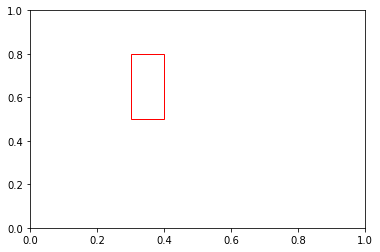

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

someX, someY = 0.5, 0.5
plt.figure()
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX -.2, someY), 0.1, 0.3, fill=None, alpha=1, color="red"))
plt.show()